# Given

A small dataset with flat sizes (x) and flat prices (y)<br>
Two data points for simplicity - a house with 1000 square feet sold for $300,000 and a house with 2000 square feet sold for $500,000.

| Size (1000 sqft)     | Price (1000s of dollars) |
| ----------------| ------------------------ |
| 1               | 300                      |
| 2               | 500                      |

# Find
Linear regression function by minimizing squared error

# Solution

In [11]:
import numpy as np
import matplotlib.pyplot as plt

Set train data

In [12]:
x_train = np.array([1,2])
y_train = np.array([300,500])

Define Loss Function $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$

In [13]:
def CalculateLoss(x,y,w,b):
    m = np.shape(x)[0] #2 rows
    f_wb = (w*x + b) - y
    cost = np.sum(f_wb**2) / 2 / m
    
    return cost

Compute Gradient  -  $\frac{\partial J(w,b)}{\partial w}$,$\frac{\partial J(w,b)}{\partial b}$

In [14]:
def ComputeGradient(x,y,w,b):
    dJ_dw = np.sum(((w*x + b) - y)*x)
    dJ_db = np.sum(((w*x + b) - y))
    return dJ_dw, dJ_db

Gradient Descent Process<br><br>
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$

In [15]:
def GD(x,y,w,b):

    w_new = w
    b_new = b

    alpha = 0.01 # learning rate
    iterations = 10000

    log = [[w,b,CalculateLoss(x,y,w,b)]]

    i = 0
    while i < iterations:

        dJ_dw, dJ_db = ComputeGradient(x,y,w_new,b_new)
        w_new = w_new - alpha*dJ_dw
        b_new = b_new - alpha*dJ_db

        i = i+1
        log.append([w_new,b_new,CalculateLoss(x,y,w_new,b_new)])
        #print(w, b, CalculateLoss(x,y,w,b))
        
    log = np.array(log)

    return w_new, b_new, log


Generate random w & b points

In [16]:
w_rand = np.random.uniform(low=-10, high=10)
b_rand = np.random.uniform(low=-10, high=10)

Run GD

In [17]:
w, b, log = GD(x_train,y_train,w_rand,b_rand)

w,b,Err2(w,b) surface to visualize the descend

In [18]:
err2 = []

for w_ in range (0, 300):
    for b_ in range (0, 200):
        error = CalculateLoss(x_train, y_train, w_, b_)
        err2.append([w_,b_,error])

err2 = np.array(err2)

Visualize surface and path

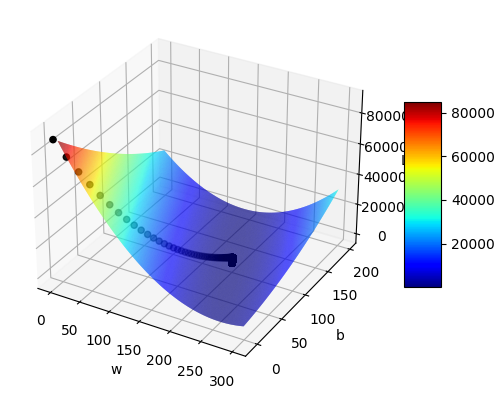

In [19]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("Loss")

from matplotlib import cm
w_b_surface = ax.plot_trisurf(err2[:,0], err2[:,1], err2[:,2], cmap=cm.jet, linewidth=0)
fig.colorbar(w_b_surface, shrink=0.5, aspect=5)

ax.scatter(log[:,0],log[:,1],log[:,2], c='black')

# Answer

In [20]:
print(f"Linear model f(x) = {w} * x + {b}")

Linear model f(x) = 199.99999689587838 * x + 100.00000502257423
